In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-25 13:01:50.180494: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-25 13:01:50.210093: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-25 13:01:50.658672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 


#######################################################

#     Este programa quando executado usa dados reconstruídos

#     Para refazer as previsões, tem que apagar os dados dos anos para prever na planilha

########################################################

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/André - RJ_Reconstrucao_Sciaenidae_2024_08_06.xlsx')
df_Pesc_goete_ind = pd.DataFrame(df[['Ano','Pesc_goete_ind']])

dados = df_Pesc_goete_ind.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1965,1974,1990,1991,1992,1993,1994,1995,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Pesc_goete_ind'].values
dados.head()

,Ano,Pesc_goete_ind
12,1962,48.515829
13,1963,71.736056
14,1964,115.805709
16,1966,42.091995
17,1967,111.215675


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [26]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=700, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Pesc_goete/pesos pesca ind/.weights.h5', overwrite=True)

Epoch 1/700


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8020  
Epoch 2/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0334 
Epoch 3/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8432 
Epoch 4/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9370 
Epoch 5/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9574 
Epoch 6/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6931 
Epoch 7/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7381 
Epoch 8/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9656 
Epoch 9/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6944 
Epoch 10/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9236 
Epoch 11/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8999 
Epoch 12/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9318 
Epoch 13/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8537 
Epoch 14/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9360 
Epoch 15/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6899 
Epoch 16/700
2/2 ━━━━━━━━━━━━━

In [14]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Pesc_goete/pesos pesca ind/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[   0.       ]
 [   0.       ]
 [   0.       ]
 [   0.       ]
 [   0.       ]
 [   0.       ]
 [   0.       ]
 [   0.       ]
 [   0.       ]
 [   0.       ]
 [   0.       ]
 [   5.7701416]
 [ 139.21716  ]
 [2114.9087   ]
 [ 171.42284  ]
 [ 128.35599  ]
 [ 103.29784  ]
 [  96.94289  ]
 [  78.63406  ]
 [  67.83957  ]
 [  50.40329  ]]


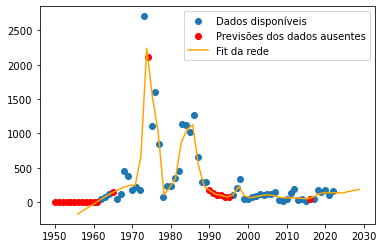

In [27]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

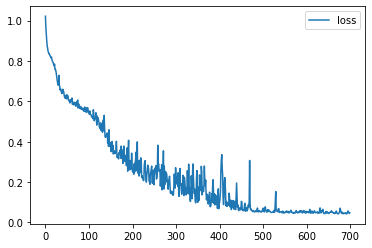

In [28]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [29]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*pesca_std + pesca_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0


df_preenchido = pd.DataFrame({'Ano':anos, 'Pesc_goete_ind':prev_continua.flatten()})


df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Pesc_goete/Interpolações e Extrapolações Pesc_goete_ind.xlsx')

df_preenchido

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Ano,Pesc_goete_ind
0,1950,0.000000
1,1951,0.000000
2,1952,0.000000
3,1953,0.000000
4,1954,0.000000
...,...,...
62,2012,61.747894
63,2013,57.109497
64,2014,52.470795
65,2015,47.832611
